# Consumo de Cereais, Recuperação e Mortalidade por COVID-19
---

1. Lucas Tonetto Firmo, aluno do Bacharelado em Engenharia da Computação, Universidade São Judas Tadeu, São Paulo, SP, lucasfirmo@hotmail.com
2. Silmara Eliza de Paula Silva, aluna do Tecnólogo em Análise e Desenvolvimento de Sistemas, Universidade São Judas Tadeu, São Paulo, SP, silmara.eliza@gmail.com
3. Thiago Berberich Cabral, aluno do Bacharelado em Sistemas de Informação, Centro Universitário UNA, Belo Horizonte, MG, thiagocabral98.tc@gmail.com
4.Deborah Figueiredo Vasconcelos Batista Lopes, docente do Centro Universitário UNA, Contagem, MG, deborah.fvasconcelos@gmail.com
5. Wesley Dias Maciel, docente do Centro Universitário UNA, Contagem, MG, wesleydiasmaciel@gmail.com




# Definições

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
plt.style.use ("classic")
%matplotlib inline

def ler_valores(df, coluna):
  return df[coluna].dropna().values.reshape(-1,1)

def regressao_linear(xdata, ydata, xlabel, ylabel):
  reg = LinearRegression()
  reg.fit(xdata, ydata)

  print("\nEquação: y = {:.5} + {:.5}X\n\n".format(reg.intercept_[0], reg.coef_[0][0]))

  previsoes = reg.predict(xdata)

  plt.scatter(xdata, ydata)
  plt.plot(xdata, previsoes)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  #plt.ylim([85, 100])
  plt.show()

def grafico(df, xlabel, ylabel):
  xdata = ler_valores(df, xlabel)
  ydata = ler_valores(df, ylabel)
  regressao_linear(xdata, ydata, xlabel, ylabel)

def pearson_r(df):
  print('Coeficiente r de correlação linear de Pearson:')
  print()
  print('Consumo x Recuperação: ', stats.pearsonr(df['Consumo de Cereais (%)'].dropna(), df['Taxa de Recuperação (%)'].dropna()))
  print('r =', df['Consumo de Cereais (%)'].dropna().corr(df['Taxa de Recuperação (%)'].dropna()))
  print()
  print('Consumo x Mortalidade: ', stats.pearsonr(df['Consumo de Cereais (%)'].dropna(), df['Taxa de Mortalidade (%)'].dropna()))
  print('r =', df['Consumo de Cereais (%)'].dropna().corr(df['Taxa de Mortalidade (%)'].dropna()))

def apresentar(df):
  pearson_r(df)
  print()
  grafico(df, 'Consumo de Cereais (%)', 'Taxa de Recuperação (%)')
  print()
  grafico(df, 'Consumo de Cereais (%)', 'Taxa de Mortalidade (%)')

def grafico_boxplot(df):
  df.boxplot(column=['Consumo de Cereais (%)'], by='Agrupamento').set(xlabel='Grupo de Países', ylabel='Consumo de Cereais (%)', title='')
  plt.title('')
  plt.suptitle('')
  plt.show()
  print()

  df.boxplot(column=['Taxa de Recuperação (%)'], by='Agrupamento').set(xlabel='Grupo de Países', ylabel='Taxa de Recuperação (%)', title='')
  plt.title('')
  plt.suptitle('')
  plt.show()
  print()

  df.boxplot(column=['Taxa de Mortalidade (%)'], by='Agrupamento').set(xlabel='Grupo de Países', ylabel='Taxa de Mortalidade (%)', title='')
  plt.title('')
  plt.suptitle('')
  plt.show()

def concat_corr():
  lista = [df_africa.corr().head(1),
           df_america_sul.corr().head(1),
           df_coz_nocivas.corr().head(1),
           df_coz_saudaveis.corr().head(1),
           df_europa.corr().head(1),
           df_mediterraneo.corr().head(1),
           df_nordicos.corr().head(1),
           df_nordicos_sem_suecia.corr().head(1),
           df_obesidade.corr().head(1),
           df_todos.corr().head(1)]

  rotulos = ['África Mediterrânea', 'América do Sul', 'Cozinhas Nocivas', 'Cozinhas Saudáveis','Europa Mediterrânea','Mediterrâneo Oriental', 'Nórdicos', 'Nórdicos sem a Suécia', 'Obesidade']

  df_concat = pd.concat(lista, keys = rotulos)

  return df_concat[['Taxa de Recuperação (%)', 'Taxa de Mortalidade (%)']]

def filtro():
  df_corr = concat_corr()
  df_corr = df_corr[abs(df_corr['Taxa de Recuperação (%)']) >= 0.5]
  return df_corr.sort_values('Taxa de Recuperação (%)')

def grafico_dispersao(xdata, ydata, xlabel, ylabel, title):
  newxdata = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'g*', 'h', ]
  print('Legenda:')
  for i in range(len(xdata)):
    print(f'{newxdata[i]} = {xdata[i]}')
  print()

  cor =[]

  for i in range(0, len(ydata)):
    if abs(ydata[i]) < 0.5:
      cor.append('red')
    else:
      cor.append('blue')

  for i in range(len(newxdata)):
    plt.scatter(newxdata[i], ydata[i], c = cor[i], s = 50, linewidth = 0)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

def grafico_dispersao_correlacoes(xdata, ydata_recuperacao, ydata_mortalidade):
  grafico_dispersao(xdata, ydata_recuperacao, 'Grupo de Países', 'Coeficiente r de Correlação Linear', 'Taxa de Recuperação (%) x Consumo de Cereais (%)')
  print()
  grafico_dispersao(xdata, ydata_mortalidade, 'Grupo de Países', 'Coeficiente r de Correlação Linear', 'Taxa de Mortalidade (%) x Consumo de Cereais (%)')



# DataFrames

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df_africa = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/a_africa_mediterranea.xlsx')
df_america_sul = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/b_america_do_sul.xlsx')
df_coz_nocivas = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/c_cozinhas_nocivas.xlsx')
df_coz_saudaveis = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/d_cozinhas_saudaveis.xlsx')
df_europa = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/e_europa_mediterranea.xlsx')
df_mediterraneo = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/f_mediterraneo_oriental.xlsx')
df_nordicos = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/g_nordicos.xlsx')
df_nordicos_sem_suecia = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/g_nordicos_sem_suecia.xlsx')
df_obesidade = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/h_obesidade.xlsx')
df_todos = pd.read_excel('/content/drive/MyDrive/Aulas/UNA/IniciaçãoCientífica/2020/todos_os_grupos_de_paises.xlsx')

# Todos os Países

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%) de todos os países considerados no estudo.
df_todos_soma = df_todos.copy()
df_todos_soma['Soma (%)'] = df_todos['Taxa de Recuperação (%)'] + df_todos['Taxa de Mortalidade (%)']
df_todos_soma

,Agrupamento,Grupo,Países,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%),Soma (%)
0,a,África Mediterrânea,Argélia,26.5633,96.2955,3.7045,100.0
1,a,África Mediterrânea,Egito,30.3504,94.1870,5.8130,100.0
2,a,África Mediterrânea,Marrocos,29.9052,98.3228,1.6772,100.0
3,a,África Mediterrânea,Tunísia,25.1440,98.3876,1.6124,100.0
4,b,América do Sul,Argentina,13.6702,97.3472,2.6528,100.0
5,b,América do Sul,Bolívia,18.0364,93.8971,6.1029,100.0
6,b,América do Sul,Brasil,12.1671,97.0765,2.9235,100.0
7,b,América do Sul,Chile,17.7775,97.2257,2.7743,100.0
8,b,América do Sul,Colômbia,15.0380,96.9987,3.0013,100.0
9,b,América do Sul,Equador,22.6665,92.0103,7.9897,100.0


In [ ]:
#DataFrame com dados estatísticos sobre o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%) para todos os países considerados no estudo.
df_todos.describe()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
count,51.000000,51.000000,51.000000
mean,16.494361,97.342435,2.657565
std,5.797336,2.085661,2.085661
min,9.382600,89.924100,0.257700
25%,12.371050,96.975000,1.517250
50%,13.768700,97.513100,2.486900
75%,18.711700,98.482750,3.025000
max,30.350400,99.742300,10.075900


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson para todos os países.
df_todos.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.00000,-0.28598,0.28598
Taxa de Recuperação (%),-0.28598,1.00000,-1.00000
Taxa de Mortalidade (%),0.28598,-1.00000,1.00000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.28597956156815896, 0.041913677762184916)
r = -0.28597956156815885

Consumo x Mortalidade:  (0.2859795615681592, 0.04191367776218488)
r = 0.2859795615681592


Equação: y = 99.039 + -0.10288X




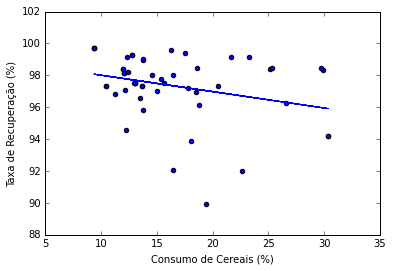



Equação: y = 0.96055 + 0.10288X




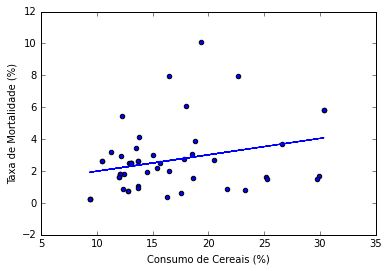

In [ ]:
#Gráficos de regressão linear para todos os países.
apresentar(df_todos)

# Grupos de Países

In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%) de cada grupo de países.
df = pd.DataFrame({'Média de Consumo'  : [df_africa['Consumo de Cereais (%)'].mean(),
                                       df_america_sul['Consumo de Cereais (%)'].mean(),
                                       df_coz_nocivas['Consumo de Cereais (%)'].mean(),
                                       df_coz_saudaveis['Consumo de Cereais (%)'].mean(),
                                       df_europa['Consumo de Cereais (%)'].mean(),
                                       df_mediterraneo['Consumo de Cereais (%)'].mean(),
                                       df_nordicos['Consumo de Cereais (%)'].mean(),
                                       df_nordicos_sem_suecia['Consumo de Cereais (%)'].mean(),
                                       df_obesidade['Consumo de Cereais (%)'].mean()],

                   'DP de Consumo'     : [df_africa['Consumo de Cereais (%)'].std(ddof=0),
                                       df_america_sul['Consumo de Cereais (%)'].std(ddof=0),
                                       df_coz_nocivas['Consumo de Cereais (%)'].std(ddof=0),
                                       df_coz_saudaveis['Consumo de Cereais (%)'].std(ddof=0),
                                       df_europa['Consumo de Cereais (%)'].std(ddof=0),
                                       df_mediterraneo['Consumo de Cereais (%)'].std(ddof=0),
                                       df_nordicos['Consumo de Cereais (%)'].std(ddof=0),
                                       df_nordicos_sem_suecia['Consumo de Cereais (%)'].std(ddof=0),
                                       df_obesidade['Consumo de Cereais (%)'].std(ddof=0)],

                   'Média de Recuperação'    : [df_africa['Taxa de Recuperação (%)'].mean(),
                                       df_america_sul['Taxa de Recuperação (%)'].mean(),
                                       df_coz_nocivas['Taxa de Recuperação (%)'].mean(),
                                       df_coz_saudaveis['Taxa de Recuperação (%)'].mean(),
                                       df_europa['Taxa de Recuperação (%)'].mean(),
                                       df_mediterraneo['Taxa de Recuperação (%)'].mean(),
                                       df_nordicos['Taxa de Recuperação (%)'].mean(),
                                       df_nordicos_sem_suecia['Taxa de Recuperação (%)'].mean(),
                                       df_obesidade['Taxa de Recuperação (%)'].mean()],

                   'DP de Recuperação' : [df_africa['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_america_sul['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_coz_nocivas['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_coz_saudaveis['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_europa['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_mediterraneo['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_nordicos['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_nordicos_sem_suecia['Taxa de Recuperação (%)'].std(ddof=0),
                                       df_obesidade['Taxa de Recuperação (%)'].std(ddof=0)],

                   'Média de Mortalidade'    : [df_africa['Taxa de Mortalidade (%)'].mean(),
                                       df_america_sul['Taxa de Mortalidade (%)'].mean(),
                                       df_coz_nocivas['Taxa de Mortalidade (%)'].mean(),
                                       df_coz_saudaveis['Taxa de Mortalidade (%)'].mean(),
                                       df_europa['Taxa de Mortalidade (%)'].mean(),
                                       df_mediterraneo['Taxa de Mortalidade (%)'].mean(),
                                       df_nordicos['Taxa de Mortalidade (%)'].mean(),
                                       df_nordicos_sem_suecia['Taxa de Mortalidade (%)'].mean(),
                                       df_obesidade['Taxa de Mortalidade (%)'].mean()],

                   'DP de Mortalidade' : [df_africa['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_america_sul['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_coz_nocivas['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_coz_saudaveis['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_europa['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_mediterraneo['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_nordicos['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_nordicos_sem_suecia['Taxa de Mortalidade (%)'].std(ddof=0),
                                       df_obesidade['Taxa de Mortalidade (%)'].std(ddof=0)]}, index=['África','América do Sul','Nocivas','Saudáveis','Europa','Mediterrâneo','Nórdicos','Nórdicos sem a Suécia', 'Obesidade'])
df

,Média de Consumo,DP de Consumo,Média de Recuperação,DP de Recuperação,Média de Mortalidade,DP de Mortalidade
África,27.990725,2.200833,96.798225,1.726389,3.201775,1.726389
América do Sul,16.667511,2.929066,96.277256,1.897897,3.722744,1.897897
Nocivas,13.215814,1.472997,97.667486,1.032016,2.332514,1.032016
Saudáveis,17.313900,7.014414,98.376271,0.882762,1.623729,0.882762
Europa,13.944025,1.888021,95.881725,2.274731,4.118275,2.274731
Mediterrâneo,21.726600,6.289447,97.478875,2.054117,2.521125,2.054117
Nórdicos,11.749320,1.246282,97.668660,1.716838,2.331340,1.716838
Nórdicos sem a Suécia,11.620375,1.363227,98.446300,0.812892,1.553700,0.812892
Obesidade,16.803329,3.462199,97.556971,3.192355,2.443029,3.192355


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson para cada grupo de países.
df_corr = concat_corr()
df_corr

,,Taxa de Recuperação (%),Taxa de Mortalidade (%)
África Mediterrânea,Consumo de Cereais (%),-0.463864,0.463864
América do Sul,Consumo de Cereais (%),-0.767833,0.767833
Cozinhas Nocivas,Consumo de Cereais (%),-0.126569,0.126569
Cozinhas Saudáveis,Consumo de Cereais (%),-0.228650,0.228650
Europa Mediterrânea,Consumo de Cereais (%),-0.656138,0.656138
Mediterrâneo Oriental,Consumo de Cereais (%),-0.800663,0.800663
Nórdicos,Consumo de Cereais (%),-0.599654,0.599654
Nórdicos sem a Suécia,Consumo de Cereais (%),-0.994857,0.994857
Obesidade,Consumo de Cereais (%),-0.173745,0.173745


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson para cada grupo de países e ordenado pela taxa de recuperação (%).
df_corr = concat_corr()
df_corr.sort_values('Taxa de Recuperação (%)')

,,Taxa de Recuperação (%),Taxa de Mortalidade (%)
Nórdicos sem a Suécia,Consumo de Cereais (%),-0.994857,0.994857
Mediterrâneo Oriental,Consumo de Cereais (%),-0.800663,0.800663
América do Sul,Consumo de Cereais (%),-0.767833,0.767833
Europa Mediterrânea,Consumo de Cereais (%),-0.656138,0.656138
Nórdicos,Consumo de Cereais (%),-0.599654,0.599654
África Mediterrânea,Consumo de Cereais (%),-0.463864,0.463864
Cozinhas Saudáveis,Consumo de Cereais (%),-0.228650,0.228650
Obesidade,Consumo de Cereais (%),-0.173745,0.173745
Cozinhas Nocivas,Consumo de Cereais (%),-0.126569,0.126569


Legenda:
a = África Mediterrânea
b = América do Sul
c = Cozinhas Nocivas
d = Cozinhas Saudáveis
e = Europa Mediterrânea
f = Mediterrâneo Oriental
g = Nórdicos
g* = Nórdicos sem a Suécia
h = Obesidade



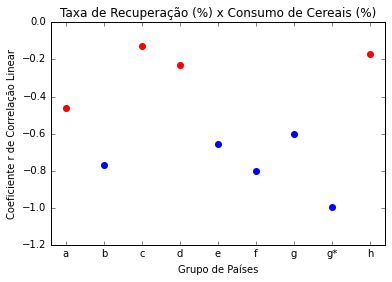


Legenda:
a = África Mediterrânea
b = América do Sul
c = Cozinhas Nocivas
d = Cozinhas Saudáveis
e = Europa Mediterrânea
f = Mediterrâneo Oriental
g = Nórdicos
g* = Nórdicos sem a Suécia
h = Obesidade



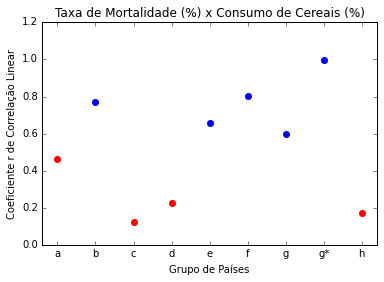

In [ ]:
#Gráfico de dispersão do coeficiente r de correlação linear de Pearson das taxas de recuperação e de mortalidade em razão do consumo de cereais para cada grupo de países.
xdata = list(df_corr.index.get_level_values(0).unique())
ydata_recuperacao = df_corr['Taxa de Recuperação (%)'].tolist()
ydata_mortalidade = df_corr['Taxa de Mortalidade (%)'].tolist()
grafico_dispersao_correlacoes(xdata, ydata_recuperacao, ydata_mortalidade)

In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson para cada grupo de países, ordenado pela taxa de recuperação (%) e com 0,5 ≤ | r | ≤ 1.
df_filtro = filtro()
df_filtro

,,Taxa de Recuperação (%),Taxa de Mortalidade (%)
Nórdicos sem a Suécia,Consumo de Cereais (%),-0.994857,0.994857
Mediterrâneo Oriental,Consumo de Cereais (%),-0.800663,0.800663
América do Sul,Consumo de Cereais (%),-0.767833,0.767833
Europa Mediterrânea,Consumo de Cereais (%),-0.656138,0.656138
Nórdicos,Consumo de Cereais (%),-0.599654,0.599654


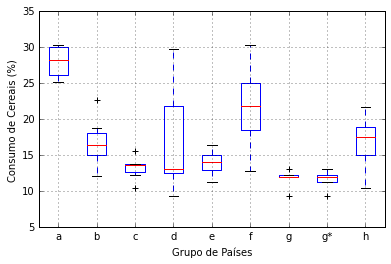

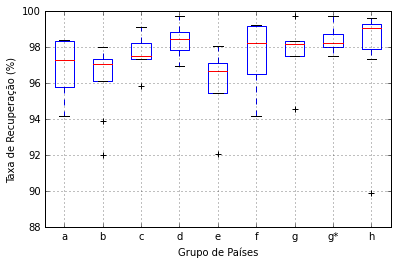

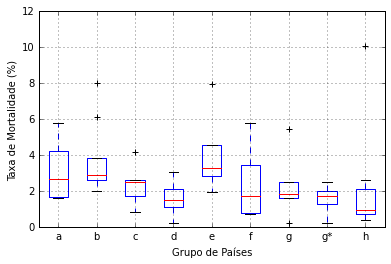

In [ ]:
#Gráfico boxplot dos grupos de países.
'''
Legenda:
a:  África Mediterrânea
b:  América do Sul
c:  Cozinhas Nocivas
d:  Cozinhas Saudáveis
e:  Europa Mediterrânea
f:  Mediterrâneo Oriental
g:  Nórdicos
g*: Nórdicos sem a Suécia
h:  Obesidade
'''

grafico_boxplot(df_todos)

# (a) África Mediterrânea

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_africa.head(4)

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%),Unnamed: 3
0,26.5633,96.2955,3.7045,NaN
1,30.3504,94.1870,5.8130,NaN
2,29.9052,98.3228,1.6772,NaN
3,25.1440,98.3876,1.6124,NaN


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_africa['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_africa['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_africa['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_africa['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_africa['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_africa['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,27.990725,2.200833,96.798225,1.726389,3.201775,1.726389


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_africa.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.463864,0.463864
Taxa de Recuperação (%),-0.463864,1.000000,-1.000000
Taxa de Mortalidade (%),0.463864,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.46386403024684025, 0.5361359697531598)
r = -0.4638640302468402

Consumo x Mortalidade:  (0.46386403024683903, 0.5361359697531609)
r = 0.46386403024683903


Equação: y = 106.98 + -0.36387X




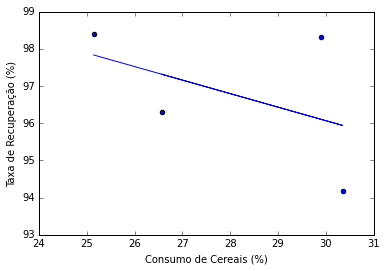



Equação: y = -6.9831 + 0.36387X




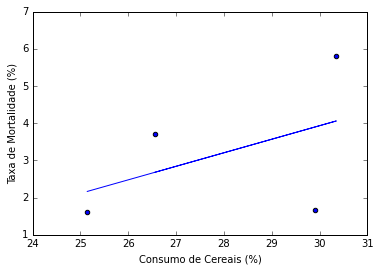

In [ ]:
#Gráficos de regressão linear.
apresentar(df_africa)

# (b) América do Sul

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_america_sul.head(9)

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,13.6702,97.3472,2.6528
1,18.0364,93.8971,6.1029
2,12.1671,97.0765,2.9235
3,17.7775,97.2257,2.7743
4,15.0380,96.9987,3.0013
5,22.6665,92.0103,7.9897
6,15.4044,97.8001,2.1999
7,18.8078,96.1299,3.8701
8,16.4397,98.0098,1.9902


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_america_sul['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_america_sul['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_america_sul['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_america_sul['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_america_sul['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_america_sul['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,16.667511,2.929066,96.277256,1.897897,3.722744,1.897897


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_america_sul.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.767833,0.767833
Taxa de Recuperação (%),-0.767833,1.000000,-1.000000
Taxa de Mortalidade (%),0.767833,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.767832826765565, 0.015686230482670316)
r = -0.7678328267655647

Consumo x Mortalidade:  (0.7678328267655656, 0.01568623048267017)
r = 0.7678328267655656


Equação: y = 104.57 + -0.49752X




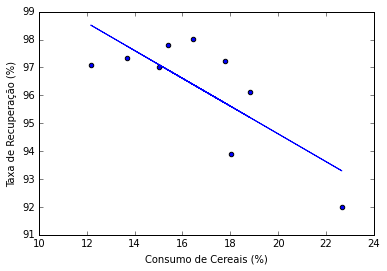



Equação: y = -4.5697 + 0.49752X




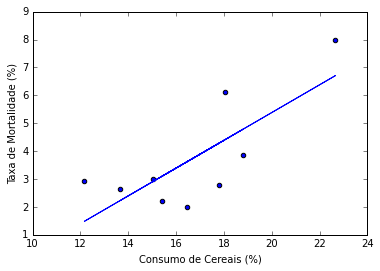

In [ ]:
#Gráficos de regressão linear.
apresentar(df_america_sul)

# (c) Cozinhas Nocivas

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_coz_nocivas.head(7)

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,12.9162,97.5131,2.4869
1,13.6702,97.3472,2.6528
2,13.7687,95.8408,4.1592
3,13.7248,98.9545,1.0455
4,10.4594,97.3608,2.6392
5,15.6506,97.5006,2.4994
6,12.3208,99.1554,0.8446


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_coz_nocivas['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_coz_nocivas['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_coz_nocivas['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_coz_nocivas['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_coz_nocivas['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_coz_nocivas['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,13.215814,1.472997,97.667486,1.032016,2.332514,1.032016


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_coz_nocivas.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.126569,0.126569
Taxa de Recuperação (%),-0.126569,1.000000,-1.000000
Taxa de Mortalidade (%),0.126569,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.12656933741307652, 0.7868461687768955)
r = -0.1265693374130765

Consumo x Mortalidade:  (0.12656933741307835, 0.7868461687768927)
r = 0.12656933741307835


Equação: y = 98.839 + -0.088677X




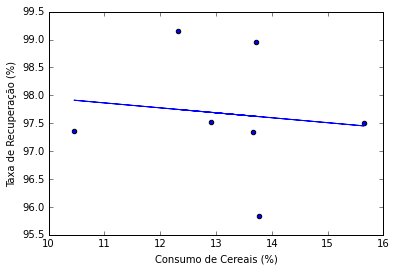



Equação: y = 1.1606 + 0.088677X




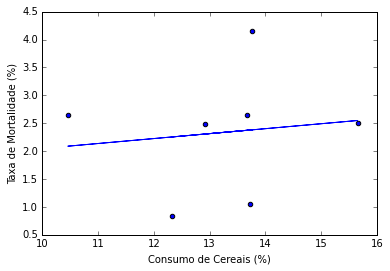

In [ ]:
#Gráficos de regressão linear.
apresentar(df_coz_nocivas)

# (d) Cozinhas Saudáveis

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_coz_saudaveis.head(7)

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,29.7303,98.4776,1.5224
1,13.0758,97.5097,2.4903
2,25.2794,98.4879,1.5121
3,9.3826,99.7423,0.2577
4,12.7832,99.2477,0.7523
5,12.4213,98.2174,1.7826
6,18.5247,96.9513,3.0487


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_coz_saudaveis['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_coz_saudaveis['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_coz_saudaveis['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_coz_saudaveis['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_coz_saudaveis['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_coz_saudaveis['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,17.3139,7.014414,98.376271,0.882762,1.623729,0.882762


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_coz_saudaveis.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.00000,-0.22865,0.22865
Taxa de Recuperação (%),-0.22865,1.00000,-1.00000
Taxa de Mortalidade (%),0.22865,-1.00000,1.00000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.22864995117405273, 0.6218985834423)
r = -0.2286499511740528

Consumo x Mortalidade:  (0.22864995117405182, 0.6218985834423014)
r = 0.22864995117405187


Equação: y = 98.874 + -0.028776X




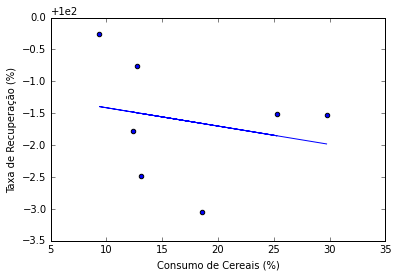



Equação: y = 1.1255 + 0.028776X




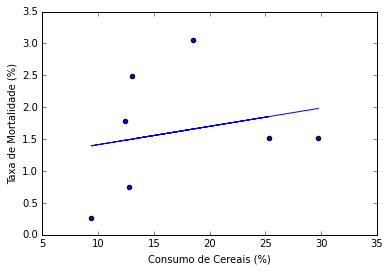

In [ ]:
#Gráficos de regressão linear.
apresentar(df_coz_saudaveis)

# (e) Europa Mediterrânea

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_europa.head()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,11.2506,96.8345,3.1655
1,13.4993,96.5758,3.4242
2,14.5430,98.0543,1.9457
3,16.4832,92.0623,7.9377


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_europa['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_europa['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_europa['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_europa['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_europa['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_europa['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,13.944025,1.888021,95.881725,2.274731,4.118275,2.274731


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_europa.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.656138,0.656138
Taxa de Recuperação (%),-0.656138,1.000000,-1.000000
Taxa de Mortalidade (%),0.656138,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.6561379322676796, 0.3438620677323204)
r = -0.6561379322676797

Consumo x Mortalidade:  (0.6561379322676785, 0.34386206773232153)
r = 0.6561379322676786


Equação: y = 106.9 + -0.79053X




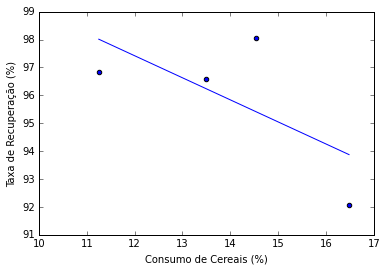



Equação: y = -6.9049 + 0.79053X




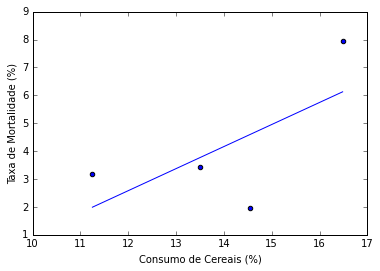

In [ ]:
#Gráficos de regressão linear.
apresentar(df_europa)

# (f) Mediterrâneo Oriental

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_mediterraneo.head()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,30.3504,94.1870,5.8130
1,12.7832,99.2477,0.7523
2,23.2690,99.1765,0.8235
3,20.5038,97.3043,2.6957


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_mediterraneo['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_mediterraneo['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_mediterraneo['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_mediterraneo['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_mediterraneo['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_mediterraneo['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,21.7266,6.289447,97.478875,2.054117,2.521125,2.054117


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_mediterraneo.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.800663,0.800663
Taxa de Recuperação (%),-0.800663,1.000000,-1.000000
Taxa de Mortalidade (%),0.800663,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.8006629395055845, 0.19933706049441546)
r = -0.8006629395055845

Consumo x Mortalidade:  (0.8006629395055855, 0.19933706049441446)
r = 0.8006629395055854


Equação: y = 103.16 + -0.26149X




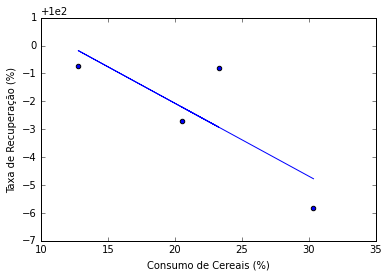



Equação: y = -3.1603 + 0.26149X




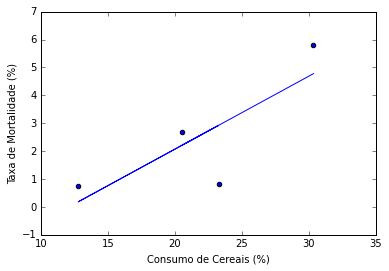

In [ ]:
#Gráficos de regressão linear.
apresentar(df_mediterraneo)

# (g) Nórdicos

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_nordicos.head()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,12.0400,98.1623,1.8377
1,13.0758,97.5097,2.4903
2,9.3826,99.7423,0.2577
3,11.9831,98.3709,1.6291
4,12.2651,94.5581,5.4419


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_nordicos['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_nordicos['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_nordicos['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_nordicos['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_nordicos['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_nordicos['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,11.74932,1.246282,97.66866,1.716838,2.33134,1.716838


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_nordicos.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.599654,0.599654
Taxa de Recuperação (%),-0.599654,1.000000,-1.000000
Taxa de Mortalidade (%),0.599654,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.5996538500182326, 0.2851096225340097)
r = -0.5996538500182327

Consumo x Mortalidade:  (0.5996538500182327, 0.28510962253400957)
r = 0.5996538500182328


Equação: y = 107.37 + -0.82606X




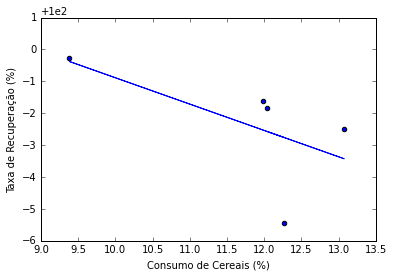



Equação: y = -7.3743 + 0.82606X




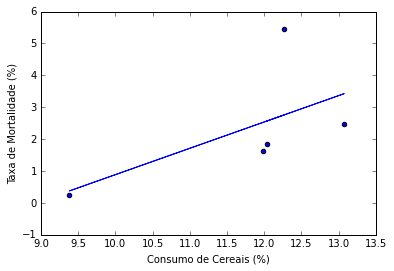

In [ ]:
#Gráficos de regressão linear.
apresentar(df_nordicos)

# (g*) Nórdicos sem a Suécia

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_nordicos_sem_suecia.head()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,12.0400,98.1623,1.8377
1,13.0758,97.5097,2.4903
2,9.3826,99.7423,0.2577
3,11.9831,98.3709,1.6291


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_nordicos_sem_suecia['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_nordicos_sem_suecia['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_nordicos_sem_suecia['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_nordicos_sem_suecia['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_nordicos_sem_suecia['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_nordicos_sem_suecia['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,11.620375,1.363227,98.4463,0.812892,1.5537,0.812892


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_nordicos_sem_suecia.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.994857,0.994857
Taxa de Recuperação (%),-0.994857,1.000000,-1.000000
Taxa de Mortalidade (%),0.994857,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.9948567582342706, 0.005143241765729445)
r = -0.9948567582342708

Consumo x Mortalidade:  (0.9948567582342711, 0.00514324176572889)
r = 0.9948567582342711


Equação: y = 105.34 + -0.59323X




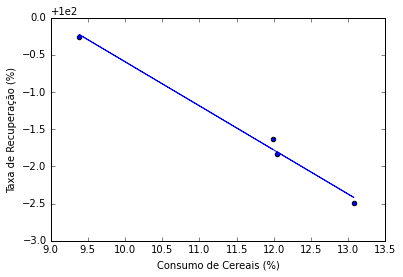



Equação: y = -5.3399 + 0.59323X




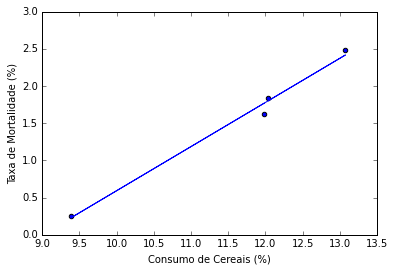

In [ ]:
#Gráficos de regressão linear.
apresentar(df_nordicos_sem_suecia)

# (h) Obesidade

In [ ]:
#DataFrame com o consumo de cereais (%), taxa de recuperação (%) e taxa de mortalidade (%).
df_obesidade.head(7)

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
0,18.6156,98.4338,1.5662
1,16.2513,99.6004,0.3996
2,10.4594,97.3608,2.6392
3,17.5357,99.3888,0.6112
4,13.7350,99.0462,0.9538
5,19.3737,89.9241,10.0759
6,21.6526,99.1447,0.8553


In [ ]:
#DataFrame com a média e o desvio padrão do consumo de cereais (%), da taxa de recuperação (%) e da taxa de mortalidade (%).
df = pd.DataFrame({'Média de Consumo'     : [df_obesidade['Consumo de Cereais (%)'].mean()],
                   'DP Consumo'           : [df_obesidade['Consumo de Cereais (%)'].std(ddof=0)],
                   'Média de Recuperação' : [df_obesidade['Taxa de Recuperação (%)'].mean()],
                   'DP Recuperação'       : [df_obesidade['Taxa de Recuperação (%)'].std(ddof=0)],
                   'Média de Mortalidade' : [df_obesidade['Taxa de Mortalidade (%)'].mean()],
                   'DP Mortalidade'       : [df_obesidade['Taxa de Mortalidade (%)'].std(ddof=0)]})
df

,Média de Consumo,DP Consumo,Média de Recuperação,DP Recuperação,Média de Mortalidade,DP Mortalidade
0,16.803329,3.462199,97.556971,3.192355,2.443029,3.192355


In [ ]:
#DataFrame com o coeficiente r de correlação linear de Pearson.
df_obesidade.corr()

,Consumo de Cereais (%),Taxa de Recuperação (%),Taxa de Mortalidade (%)
Consumo de Cereais (%),1.000000,-0.173745,0.173745
Taxa de Recuperação (%),-0.173745,1.000000,-1.000000
Taxa de Mortalidade (%),0.173745,-1.000000,1.000000


Coeficiente r de correlação linear de Pearson:

Consumo x Recuperação:  (-0.17374544658286006, 0.7094723774394411)
r = -0.1737454465828601

Consumo x Mortalidade:  (0.17374544658286045, 0.70947237743944)
r = 0.17374544658286048


Equação: y = 100.25 + -0.1602X




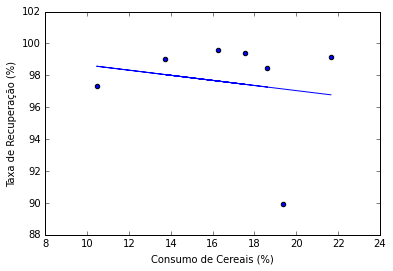



Equação: y = -0.24893 + 0.1602X




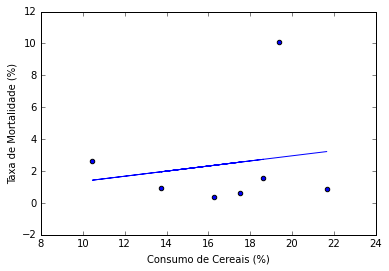

In [ ]:
#Gráficos de regressão linear.
apresentar(df_obesidade)